In [14]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
from scipy.io import loadmat  
 
 
data = loadmat('ex8data1.mat')  
X = data['X']   
print(X.shape)

(307, 2)


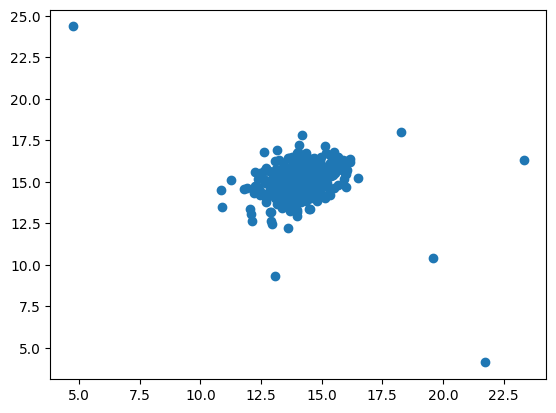

In [15]:
plt.scatter(X[:,0],X[:,1])

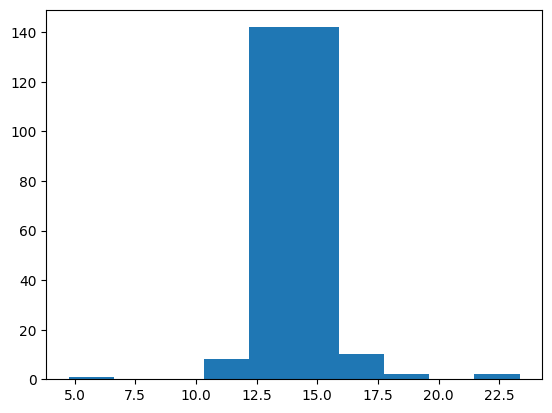

(array([  1.,   0.,   1.,   2.,  53., 219.,  30.,   0.,   0.,   1.]),
 array([ 4.12623222,  6.14864973,  8.17106723, 10.19348473, 12.21590223,
        14.23831974, 16.26073724, 18.28315474, 20.30557224, 22.32798975,
        24.35040725]),
 <BarContainer object of 10 artists>)

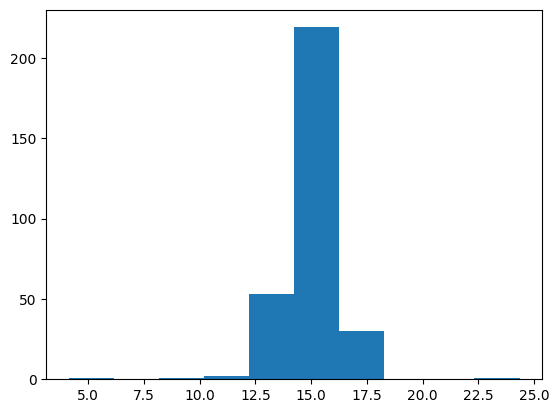

In [35]:
plt.hist(X[:,0])
plt.show()
plt.hist(X[:,1])

In [40]:
def estimate_gaussian(X):  
    num_examples = X.shape[0]
    mu = (1 / num_examples) * np.sum(X, axis=0) 
    sigma = np.sqrt((1 / num_examples) * np.sum((X - mu) ** 2, axis=0))
    return mu, sigma
 
# TODO: run the function for your dataset
mu, sigma = estimate_gaussian(X)
print(mu, sigma)

[14.11222578 14.99771051] [1.35374717 1.3075723 ]


In [41]:
Xval = data['Xval']  
yval = data['yval']
print(Xval.shape,yval.shape)

(307, 2) (307, 1)


In [43]:
from scipy import stats
p = np.zeros((X.shape[0], X.shape[1]))
p[:, 0] = stats.norm.pdf(X[:, 0], mu[0], sigma[0])
p[:, 1] = stats.norm.pdf(X[:, 1], mu[1], sigma[1])

In [44]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
pval[:, 0] = stats.norm.pdf(Xval[:, 0], mu[0], sigma[0])
pval[:, 1] = stats.norm.pdf(Xval[:, 1], mu[1], sigma[1])

In [48]:
from sklearn.metrics import f1_score

def select_threshold(pval, yval): 
    thresholds = np.linspace(pval.min(), pval.max(), 10000)
    best_f1 = 0

    for threshold in thresholds:
        ypred = (pval[:, 0] < threshold) | (pval[:, 1] < threshold)
        new = f1_score(yval, ypred.astype(int))
        if new > best_f1:
            best_f1 = new
            best_epsilon = threshold
    return best_epsilon, best_f1

In [49]:
print(select_threshold(pval,yval))

(0.0003966715195093453, 0.8750000000000001)
